In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path = 'liver_cirrhosis.csv'
data = pd.read_csv(file_path)

In [3]:
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [4]:
X = data_encoded.drop(columns=['Stage'])
y = data_encoded['Stage']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf_classifier = RandomForestClassifier(random_state=42)

In [7]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = rf_classifier.predict(X_test)

Result

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9572

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95      1657
           2       0.94      0.96      0.95      1697
           3       0.97      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



Confusion matrix

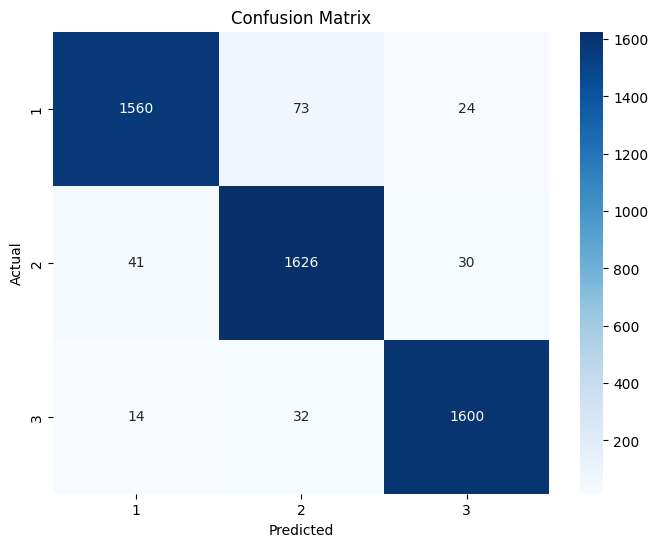

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
importances = rf_classifier.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

Feature Importance Graph

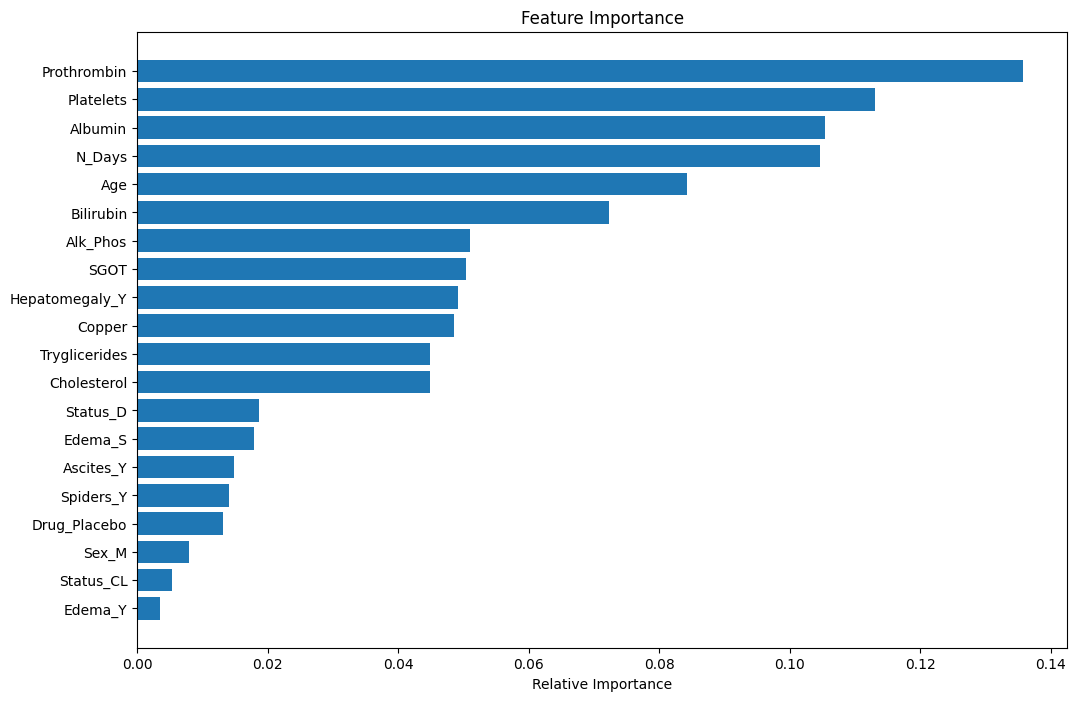

In [22]:
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  
plt.show()

Prediction

In [25]:
def predict_stage(user_input):
    input_df = pd.DataFrame([user_input])
    input_encoded = pd.get_dummies(input_df, columns=categorical_columns, drop_first=True)
    input_encoded = input_encoded.reindex(columns=X_train.columns, fill_value=0)
    prediction = rf_classifier.predict(input_encoded)
    return prediction[0]
user_input = {
    'N_Days': 2900,
    'Status': 'C',
    'Drug': 'Placebo',
    'Age': 50,
    'Sex': 'F',
    'Ascites': 'N',
    'Hepatomegaly': 'N',
    'Spiders': 'N',
    'Edema': 'N',
    'Bilirubin': 1.2,
    'Cholesterol': 200.0,
    'Albumin': 3.5,
    'Copper': 200.0,
    'Alk_Phos': 700.0,
    'SGOT': 80.0,
    'Tryglicerides': 120.0,
    'Platelets': 250.0,
    'Prothrombin': 40.5
}

predicted_stage = predict_stage(user_input)
print(f"Predicted Stage: {predicted_stage}")

Predicted Stage: 1
